In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Brain vs. Body Weight.

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks

1.Find the linear regression equation for this data for brain weight to body weight.

2.Chart the original data and the equation on the chart.

3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Find the linear regression equation for this data for brain weight to body weight.

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
iqr = df['Brain'].quantile(0.75)-df['Brain'].quantile(0.25)
upper = df['Brain'].quantile(0.75)+(1.5*iqr)
lower = df['Brain'].quantile(0.25)-(1.5*iqr)
upper,lower

(119.60625, -70.80375000000001)

In [ ]:
df['Brain'] = df['Brain'].clip(lower,upper)

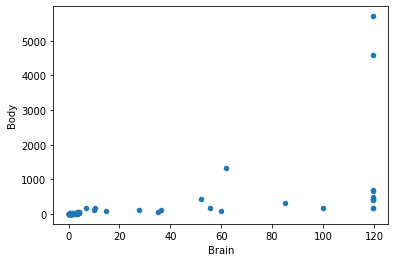

In [ ]:
df.plot(x = 'Brain',y = 'Body' , kind = 'scatter')

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.510595
Body,0.510595,1.000000


In [ ]:
x = df.loc[:,['Brain']].values
y = df.loc[:,'Body'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
A = LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

Chart the original data and the equation on the chart.

In [ ]:
df.columns

Index(['Brain', 'Body'], dtype='object')

In [ ]:
temp = df[['Brain']].values

In [ ]:
pred = A.predict(temp)

In [ ]:
df1 = pd.DataFrame({'brain':df['Brain'],'body': pred})

In [ ]:
df.sort_values(by = 'Brain', inplace = True)
df1.sort_values(by = 'brain', inplace = True)

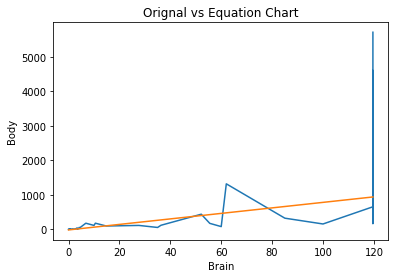

In [ ]:
plt.plot(df['Brain'],df['Body'])
plt.plot(df1['brain'],df1['body'])
plt.title('Orignal vs Equation Chart')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

Find the equation's R2 score 

In [ ]:
y_pred = A.predict(x_test)

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.21242834574748615
